In [ ]:
import torch
import torchvision
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler

In [ ]:
ds = CIFAR10(root = './data', train= True , transform=ToTensor(), download=True)

100%|██████████| 170M/170M [00:23<00:00, 7.39MB/s]


In [ ]:
ds

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
import numpy as np

In [ ]:
def split_generator(size,percentage):
  num = int(size*percentage)
  indices = np.random.permutation(size)
  return indices[num:],indices[:num]

In [ ]:
ds.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
train_index, validation_index = split_generator(len(ds),0.2)

In [ ]:
len(train_index),len(validation_index)

(40000, 10000)

In [ ]:
train_sample = SubsetRandomSampler(train_index)
validation_sample = SubsetRandomSampler(validation_index)

train_dl = DataLoader(ds, batch_size=100,sampler = train_sample)
validation_dl = DataLoader(ds, batch_size=100,sampler = validation_sample)
len(train_dl),len(validation_dl)

(400, 100)

In [ ]:
import torch.nn as nn

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

4


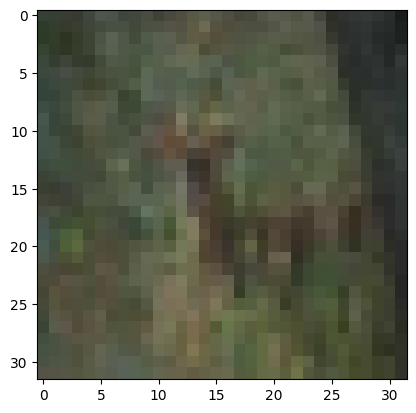

In [ ]:
plt.imshow(ds[10][0].permute(1,2,0))
print(ds[10][1])

In [ ]:
ds[0][0].shape

torch.Size([3, 32, 32])

tensor(2)


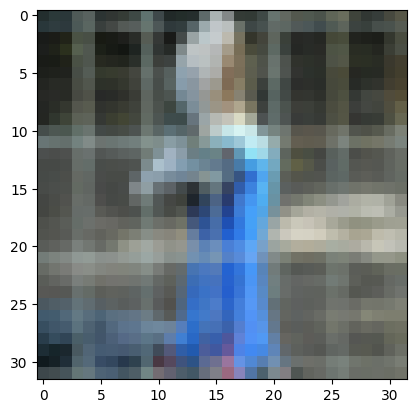

In [ ]:
for images,labels  in train_dl:
  plt.imshow(images[0].permute(1,2,0))
  print(labels[0])
  break

In [ ]:

def get_device():
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [ ]:

def device_to(data,device):
  """Move Tensor(s) to chosen Device"""

  if isinstance(data, (list,tuple)):
    return [device_to(x, device) for x in data]
  return data.to(device, non_blocking = True)

In [ ]:

class DataLoader():
  """
  A custom DataLoader that moves batches of data to the specified device.
  """
  def __init__(self,dl,device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    for b in self.dl:
      yield device_to(b,self.device)

  def __len__(self):
    return len(self.dl)

In [ ]:
train_dl = DataLoader(train_dl,get_device())
validation_dl = DataLoader(validation_dl,get_device())

In [ ]:
class CnnModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,16 ,3,1,1)
    self.relu1 = nn.ReLU()
    self.maxPool1 = nn.MaxPool2d(2,2)

    self.conv2 = nn.Conv2d(16,16,3,1,1)
    self.relu2 = nn.ReLU()
    self.maxPool2 = nn.MaxPool2d(2,2)

    self.conv3 = nn.Conv2d(16,16,3,1,1)
    self.relu3 = nn.ReLU()
    self.maxPool3 = nn.MaxPool2d(2,2)

    self.conv4 = nn.Conv2d(16,16,3,1,1)
    self.relu4 = nn.ReLU()
    self.maxPool4 = nn.MaxPool2d(2,2)

    self.conv5 = nn.Conv2d(16,16,3,1,1)
    self.relu5 = nn.ReLU()
    self.maxPool5 = nn.MaxPool2d(2,2)

    self.Flatten = nn.Flatten()
    self.linear = nn.Linear(16*1*1,10)



  def forward(self,x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.maxPool1(x)

    x = self.conv2(x)
    x = self.relu2(x)
    x = self.maxPool2(x)

    x = self.conv3(x)
    x = self.relu3(x)
    x = self.maxPool3(x)

    x = self.conv4(x)
    x = self.relu4(x)
    x = self.maxPool4(x)

    x = self.conv5(x)
    x = self.relu5(x)
    x = self.maxPool5(x)

    x = self.Flatten(x)
    x = self.linear(x)

    return x


In [ ]:
model1 = CnnModel()

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3,16,3,1,1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(16,16,3,1,1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

     nn.Conv2d(16,16,3,1,1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

     nn.Conv2d(16,16,3,1,1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

     nn.Conv2d(16,16,3,1,1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Flatten(),
    nn.Linear(16,10)

)

In [ ]:
device_to(model,get_device())

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=16, out_features=10, bias=True)
)

In [ ]:
def batch_loss(model, loss_fn, xb,yb, optim=None,metric=None):
  preds = model(xb)
  loss = loss_fn(preds,yb)

  if optim is not None:
    loss.backward()
    optim.step()
    optim.zero_grad()
  metric_val = None
  if metric is not  None:
    metric_val = metric(preds,yb)

  return loss.item(),len(xb),metric_val


In [ ]:
def evaluate(model,loss_fn,valid_dl,optim=None,metric=None):
  if optim is not None:
    result = [batch_loss(model,loss_fn,xb,yb,optim,metric) for xb,yb in valid_dl]
  losses,num,metrics = zip(*result)

  tot_size = np.sum(num)
  avg_loss = np.sum(np.multiply(losses,num))/tot_size
  avg_metric = None
  if metric is not None:
    avg_metric = np.sum(np.multiply(metrics,num))/tot_size

  return avg_loss,avg_metric

In [ ]:
def fit(model,loss_fn,train_dl,valid_dl,epochs,optim=None,metric=None):
  losses, metrics = [] , []
  for epoch in range(epochs):
    model.train()
    for xb,yb in train_dl:
      loss,_,_ = batch_loss(model,loss_fn,xb,yb,optim,metric)

    model.eval()
    avg_loss,avg_metric = evaluate(model,loss_fn,valid_dl,optim,metric)
    losses.append(avg_loss)
    metrics.append(avg_metric)
    print("Epoch {}/{},Loss: {} , Accuracy: {}".format(epoch+1,epochs,avg_loss,avg_metric))
  return losses, metrics

In [ ]:
import torch.nn.functional as F
loss_fn = F.cross_entropy

In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
def accuracy(preds,labels):
  _,preds = torch.max(preds,dim=1)
  return torch.sum(preds==labels).item()/len(preds)

In [34]:
losses, metrics = fit(model,loss_fn,train_dl,validation_dl,10,optimizer,accuracy)

Epoch 1/10,Loss: 1.6149233758449555 , Accuracy: 0.4007
Epoch 2/10,Loss: 1.5449543356895448 , Accuracy: 0.4313
Epoch 3/10,Loss: 1.4915761506557466 , Accuracy: 0.4561
Epoch 4/10,Loss: 1.42974635720253 , Accuracy: 0.4848
Epoch 5/10,Loss: 1.382387353181839 , Accuracy: 0.4931
Epoch 6/10,Loss: 1.333624277114868 , Accuracy: 0.5152
Epoch 7/10,Loss: 1.2977767550945283 , Accuracy: 0.5275
Epoch 8/10,Loss: 1.2555242717266082 , Accuracy: 0.5458
Epoch 9/10,Loss: 1.2435854095220567 , Accuracy: 0.5537
Epoch 10/10,Loss: 1.202026436328888 , Accuracy: 0.5643


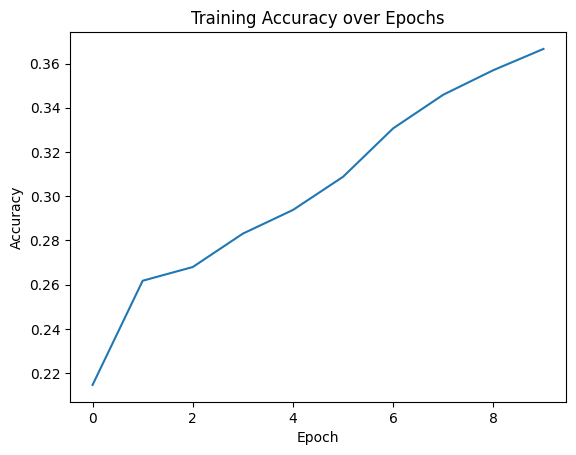

In [ ]:
plt.plot(metrics)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.show()

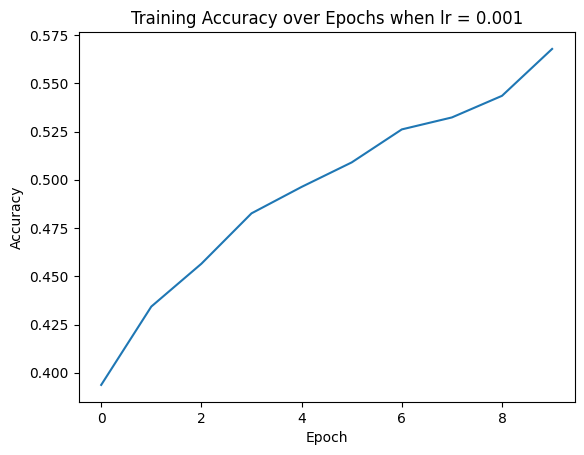

In [ ]:
plt.plot(metrics)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs when lr = 0.001')
plt.show()

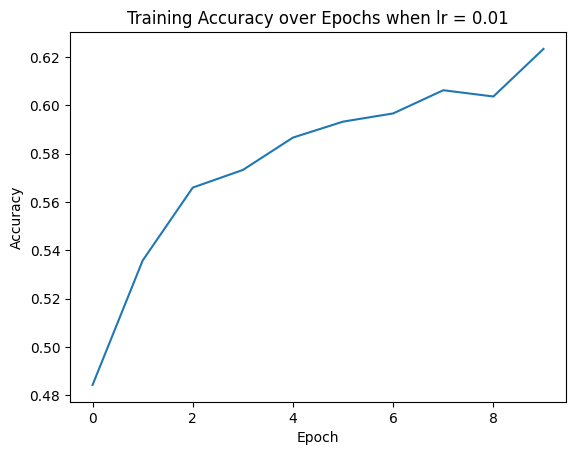

In [ ]:
plt.plot(metrics)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs when lr = 0.01')
plt.show()

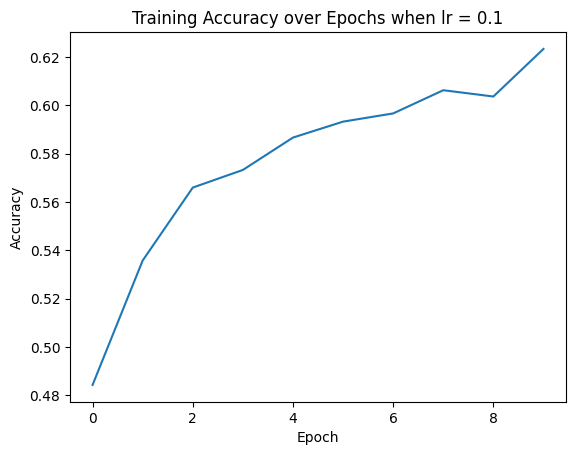

In [ ]:
plt.plot(metrics)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs when lr = 0.1')
plt.show()